In [135]:
import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import random

In [143]:
data = np.load('data.npz')
print(data.files)
x1 = data['x1']
x2 = data['x2']
y = data['y']
a = 0.01

['y', 'x2', 'x2_test', 'x1', 'y_test', 'x1_test']


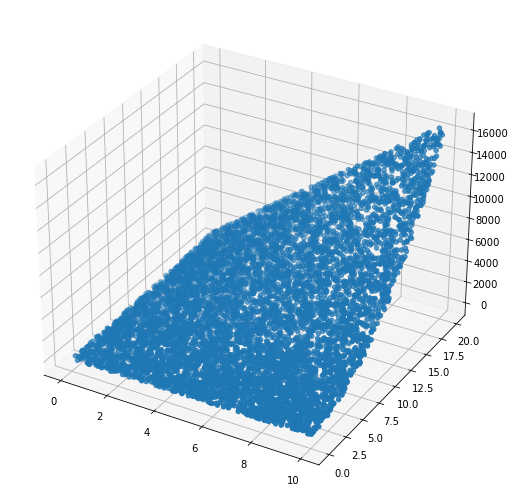

In [137]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter(x1, x2, y)
plt.show()

In [144]:
    b = np.array([[1],[1],[1]])
    matrix1 = np.full((len(x1),1),1)
    x = np.concatenate((matrix1,x1.reshape(len(x1),1),x2.reshape(len(x2),1)) , axis = 1)

In [145]:
for i in range (50):
    b1 = np.transpose(x)@x@b - np.transpose(x)@y.reshape(len(y),1)
    b = b - a*b1
print(b)

[[-8.77661084e+205]
 [-4.62818824e+206]
 [-1.11566763e+207]]


In [146]:
b_new = np.array([[1],[1],[1]])

In [149]:
for i in range (300):
    randoms = random.randint(0, len(x1)-1)
    xx = np.array([[1 , x1[randoms], x2[randoms]]])
    b2 = np.transpose(xx)@xx@b_new - 0.1*np.transpose(xx)*y[randoms]
    b_new = b_new - a*b2
print(b_new)

[[ 41315.34084038]
 [414370.92034184]
 [971322.65038923]]


In [178]:
x1_test = data['x1_test']
x2_test = data['x2_test']
y_test = data['y_test']

In [179]:
xxx  = np.concatenate((np.full((len(x1_test) , 1),1), x1_test.reshape(len(x1_test),1), x2_test.reshape(len(x2_test),1)), axis=1)

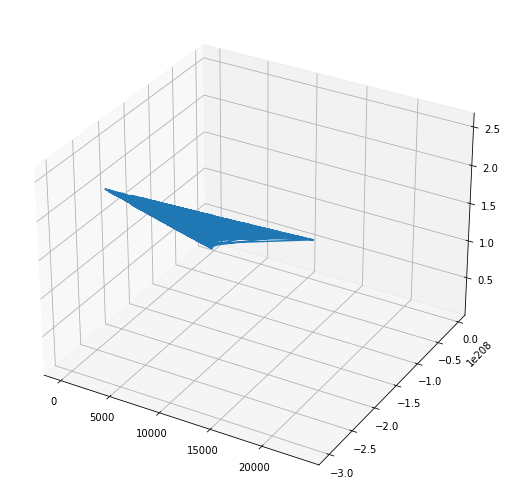

In [180]:
y1 = xxx@b
y2 = xxx@b_new
ax = plt.axes(projection ='3d')
ax.plot3D(y_test, y1.reshape(len(y1)), y2.reshape(len(y2)))
plt.show()

In [181]:
arr1 = y1.reshape(len(y1))
error = 0
for i in range(len(y_test)):
    error += (y_test[i] - arr1[i])**2
print (error)

inf


<ipython-input-181-a8f53434b4b0>:4: RuntimeWarning: overflow encountered in double_scalars
  error += (y_test[i] - arr1[i])**2


In [167]:
arr2 = y2.reshape(len(y2))
error2 = 0
for i in range(len(y_test)):
    error2 += (y_test[i] - arr2[i])**2
print (error2)

4.4060660717834125e+17
